# 

# Functions in Julia

Read more about this [here](http://mth229.github.io/functions.html).

For some problems herein, you will need features made available in the
add-on `MTH229` package, which is loaded with the following command:

In [1]:
using MTH229

(When you run the cell to load the `MTH229` – and other add-on packages
– an asterisk will appear in the label to the left of the cell: `[*]`.
When the packages have been loaded, which can take awhile, the asterisk
will turn into a number.)

This command loads the `Plots` package, which we will use in these
notes.

In [1]:
using Plots

We will typically combine these and run this command when loading a
`Julia` notebook at the *start* of a session:

In [0]:
using MTH229
using Plots
plotly()

(The last command loads a plotting backend which allows some
interactivity.)

------------------------------------------------------------------------

A *function* in mathematics is [defined](http://tinyurl.com/c2rwqyb) as
“a relation between a set of inputs and a set of permissible outputs
with the property that each input is related to exactly one output.”
That is a general definition. Specialized to mathematical functions of
one real variable returning a real value (univariate, scalar-valued
functions), we can define a function in terms of a rule—what happens to
$x$ to produce $y$, such as this one which squares $x$ then subtracts
$2$:

$$
f(x) = x^2 - 2.
$$

The **domain** of a function is the set of all permissible values for
$x$, in this example this is all $x$, but this need not be the case
either due to the rule not being defined for some $x$ or a more explicit
restriction, such as $x \geq 0$.

The **range** is the set of all possible outputs. Written in set
notation, this is $\{f(x): x \in \text{ the domain }\}$.

Mathematically, we evaluate or **call** a function with the notation
$f(2)$ or $f(3)$, say.

Mathematically we might refer to the function by its name, $f$, or its
values such as $f(2)$ or $f(\pi)$.

In `Julia` basic mathematical functions are defined and used with the
*exact* same notation, save for accommodations in translating math to
`Julia`.

For example, this command creates a function `f`:

In [1]:
f(x) = x^2 - 2

f (generic function with 1 method)

Unlike an expression, the value `x` in the definition of `f(x)` does not
need to be defined until the function is actually called. As with math,
this variable name need not be `x` – it could be `t`, `y`, `theta`, or
any other valid name.

We *call* `f` for the given value using the same `f(x)` notation. For
example, finding our `f` at the value of `2` is done with:

In [1]:
f(2)

2

That is, as with typical mathematical notation, the function is “called”
by passing a value to it with parentheses.

Within a cell, we can evaluate one or more values by using commas to
separate them:

In [1]:
f(1), f(2), f(3)

(-1, 2, 7)

The function name refers to the function object:

In [1]:
f

f (generic function with 1 method)

Don’t worry about the words “generic” and “method”, but be aware that
because of this once you have defined a name as a variable it can not be
re-purposed as a *generic* function name and vice versa. (In the common
first case, read the error message, it will say something like:
`ERROR: cannot define function a; it already has a value`.)

The “domain” of a `Julia` function is similar in meaning to its
mathematical counterpart. `Julia` may respond with different values,
such as `Inf`, for infinity; `NaN`, when an expression is indeterminate;
or it may throw an error, typically a `DomainError`:

In [1]:
f(x) = sqrt(x)/(x*(1-x))
f(1), f(0)

(Inf, NaN)

and an error with:

In [1]:
f(-1)

Functions can be more complicated than the “one-liners” illustrated. In
that case, a multiline form is available:

In [0]:
function fn_name(args...)
  body
end

The keyword `function` indicates this is a function whose name is given
in the definition. Within the body, the last expression evaluated is the
output, unless a `return` statement is used.

------------------------------------------------------------------------

For basic uses of functions—90 percent of the uses in this class—the
above covers what you need to know about functions.

## Cases

Some functions are defined in terms of cases. For example, a cell phone
plan might depend on the data used through:

> The amount is 35 dollars for the first 9 Gb of data, and 10 dollars
> more for each *additional* Gb of data.

This function has two cases to consider: one if the data is less than 9
Gb and the other when it is more.

In a math class we would write this as:

$$
\text{cost}(\text{data}) = \begin{cases}
35.0,                   & \text{data} \leq 9.0 \\\\
35.0+10.0\cdot(\text{data}-9.0), & \text{otherwise.}
\end{cases}
$$

How to write this in `Julia`?

The ternary operator `predicate ? expression1 : expression2` has three
pieces: a predicate question, such as `x < 10` and two expressions, the
first is evaluated if the predicate is `true` and the second if the
predicate is `false`. Using the ternary operator, simple case-like
functions can be defined in one line.

For example, the above can be defined in `Julia` with:

In [1]:
cost(data) = data <= 9.0 ? 35.00 : 35.00 + 10.00 * (data - 9.0)

cost (generic function with 1 method)

So, three pieces: **First**, you ask a question. **Second**, what should
the function do if the answer is ‘yes’? **Third**, what should the
function do if the answer is ‘no’?

## Composition

Composition of functions is a useful means to break complicated problems
into easier to solve ones. The math notation is typically $f(g(x))$ and
in `Julia` this is no different.

## Functions may need more than one argument

In `Julia` some functions require more than one argument. There are two
ways that a function can distinguish between arguments:

**Using position**. A typical case is the function expressing the $\log$
of $x$ base $b$. The function must have both a position to pass in
values for either $x$ or $b$. In `Julia` the function is written
`log(b, x)`:

In [1]:
b, x = 5, 100
a = log(b, x)
b^a - x  # verify, is this close to 0?

8.526512829121202e-14

(This also shows that `Julia` can have the same name for **different**
functions, as `log(x)` does the logarithm base $e$ and takes only $1$
argument.)

**Using keyword names**. Some arguments can be designated by a
“keyword”, which have default values. This is heavily used with the
plotting package we use, where data is specified by position and
attributes of the resulting figure are adjusted with keyword arguments.
Plotting features are provided in add-on packages; we use `Plots` in
these projects.

Here is a mathematical example from the theory of
[wavelets](https://en.wikipedia.org/wiki/Wavelet).

Define `mother` by

In [1]:
mother(x) = (sin(2*pi*x) - sin(pi*x))/(pi*x)

mother (generic function with 1 method)

This function is *scaled* and *shifted* in application. To keep track of
the scale (by `a`) and the shift (by `b`) we might define a function
that allows these to be passed as *parameters*

In [1]:
child(x, a, b) = mother((x-b)/a) / sqrt(a)

child (generic function with 1 method)

This would then be called like:

In [1]:
child(1/2, 1, 0)

-0.6366197723675813

or like

In [1]:
child(1/2, 2, 1)

0.2636965437895248

(It isn’t illustrated, but there are means to make default values for
the parameters.)

## Functions can be used as arguments to other functions:

Calculus has three main operations: The limit of a *function*, the
derivative of a *function*, and the integral of a *function*. These
operations take a function and compute some value. For limits this value
is a number, for derivatives this value is another function. In `Julia`
we will use functions to implement each.

Using `Julia` operations on functions are just functions where the
*arguments* are themselves functions and, *possibly*, the return value
is also a function.

The first example we will encounter is related to plotting. The details
come later:


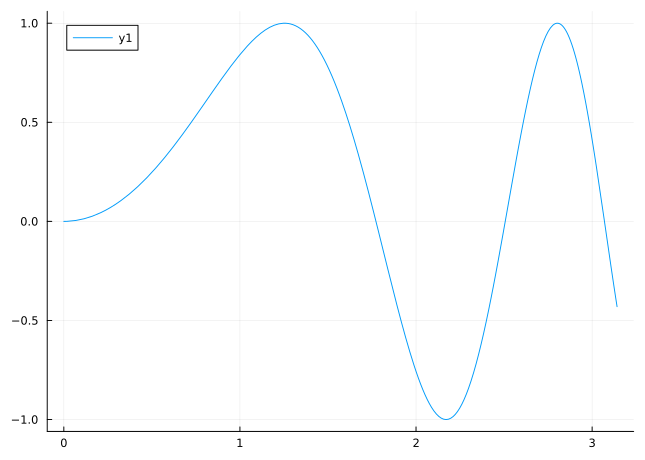

In [1]:
f(x) = sin(x^2)
plot(f, 0, pi)

The first argument to `plot` is a function object–not a function call,
as in `f(x)`, the second and third describe an interval to plot over.
This will be a typical pattern: `someaction(f, arguments...)`.

When a function returns a function, we may simply assign it a name. For
example, there is a `tangent` function in the `MTH229` package takes a
function `f` and a point `c` and returns a function that computes the
tangent line to `f` at `c`. Here we give it a name:

In [1]:
tl = tangent(f, pi/4)

Function of `x` to compute the tangent line of `f` at `c`:
    f(c) + f'(c) * (x-c)

It is called, just like other functions:

In [1]:
f(pi/5), tl(pi/5)

(0.38460897507732444, 0.3772017669761397)

------------------------------------------------------------------------

In [1]:
# Enter your commands here
